In [2]:
import pandas as pd
import prepare
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [3]:
# Load your Excel file
df = pd.read_excel('potential-talents.xlsx')

# Concatenate all job titles into a single string
all_job_titles = ' '.join(df['job_title'].astype(str))

print(all_job_titles)

2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional Native English Teacher at EPIK (English Program in Korea) Aspiring Human Resources Professional People Development Coordinator at Ryan Advisory Board Member at Celal Bayar University Aspiring Human Resources Specialist Student at Humber College and Aspiring Human Resources Generalist HR Senior Specialist Student at Humber College and Aspiring Human Resources Generalist Seeking Human Resources HRIS and Generalist Positions Student at Chapman University SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR Human Resources Coordinator at InterContinental Buckhead Atlanta 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional Native English Teacher at EPIK (English Program in Korea

In [4]:
type(all_job_titles)

str

In [5]:
all_job_titles=prepare.clean(all_job_titles)

In [6]:
all_job_titles

'2019 ct bauer college business graduate magna cum laude aspiring human resource professional native english teacher epik english program korea aspiring human resource professional people development coordinator ryan advisory board member celal bayar university aspiring human resource specialist student humber college aspiring human resource generalist hr senior specialist student humber college aspiring human resource generalist seeking human resource hris generalist position student chapman university svp chro marketing communication csr officer engie houston woodland energy gphr sphr human resource coordinator intercontinental buckhead atlanta 2019 ct bauer college business graduate magna cum laude aspiring human resource professional 2019 ct bauer college business graduate magna cum laude aspiring human resource professional native english teacher epik english program korea aspiring human resource professional people development coordinator ryan 2019 ct bauer college business gradu

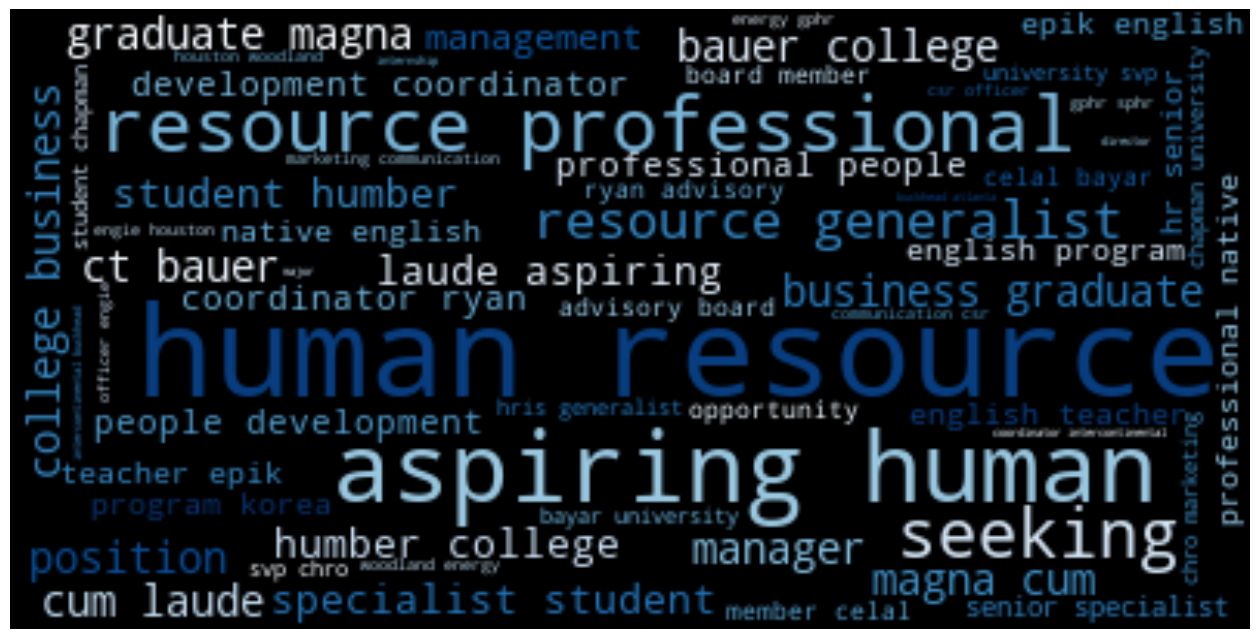

In [7]:
wc = WordCloud(background_color='black', contour_width=2, contour_color='black', colormap = 'Blues').generate(all_job_titles)
plt.figure(figsize=[16,16])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Extract the column with job titles
job_titles = df['job_title'].astype(str)

# Search terms
search_term_1 = "Aspiring human resources"
search_term_2 = "seeking human resources"

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the TF-IDF model on job titles and transform the job titles
tfidf_matrix = tfidf_vectorizer.fit_transform(job_titles)

# Transform search terms into vectors
search_term_1_vector = tfidf_vectorizer.transform([search_term_1])
search_term_2_vector = tfidf_vectorizer.transform([search_term_2])

# Compute cosine similarity between each job title and search terms
cosine_to_term_1 = cosine_similarity(tfidf_matrix, search_term_1_vector).flatten()
cosine_to_term_2 = cosine_similarity(tfidf_matrix, search_term_2_vector).flatten()


# Calculate angles in degrees
angles_to_term_1 = np.degrees(np.arccos(cosine_to_term_1))
angles_to_term_2 = np.degrees(np.arccos(cosine_to_term_2))


# Create a DataFrame with the required columns
output_df = pd.DataFrame({
    "job title": job_titles,
    "angle (degrees) to search term 1": angles_to_term_1,
    "angle (degrees) to search term 2": angles_to_term_2
})

# Rank job titles based on similarity to Search Term 1
ranked_by_term_1 = output_df.sort_values(by="angle (degrees) to search term 1", ascending=True)

# Rank job titles based on similarity to Search Term 2
ranked_by_term_2 = output_df.sort_values(by="angle (degrees) to search term 2", ascending=True)

print("\nJob Titles Ranked by Similarity to Search Term 1:")
print(ranked_by_term_1[["job title", "angle (degrees) to search term 1"]])

print("\nJob Titles Ranked by Similarity to Search Term 2:")
print(ranked_by_term_2[["job title", "angle (degrees) to search term 2"]])




Job Titles Ranked by Similarity to Search Term 1:
                                             job title  \
32               Aspiring Human Resources Professional   
57               Aspiring Human Resources Professional   
45               Aspiring Human Resources Professional   
96               Aspiring Human Resources Professional   
20               Aspiring Human Resources Professional   
..                                                 ...   
62                       Student at Chapman University   
63   SVP, CHRO, Marketing & Communications, CSR Off...   
31   Native English Teacher at EPIK (English Progra...   
17              People Development Coordinator at Ryan   
103   Director Of Administration at Excellence Logging   

     angle (degrees) to search term 1  
32                          41.097594  
57                          41.097594  
45                          41.097594  
96                          41.097594  
20                          41.097594  
..          

In [10]:
from gensim.models import Word2Vec
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity

# Extract the column with job titles
job_titles = df['job_title'].astype(str)

# Search terms
search_term_1 = "Aspiring human resources"
search_term_2 = "seeking human resources"


# Preprocessing: Split job titles and search terms into words
def preprocess_text(text):
    return [word.lower() for word in text.split() if word.isalpha()]

processed_job_titles = [preprocess_text(title) for title in job_titles]
processed_search_term_1 = preprocess_text(search_term_1)
processed_search_term_2 = preprocess_text(search_term_2)

# Train a Word2Vec model on job titles (or load pre-trained Word2Vec)
dataset = api.load("text8")  # load dataset as iterable
word2vec_model = Word2Vec(dataset)  # train w2v model

# Function to compute the average vector for a text
def get_average_vector(words, model, vector_size):
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Compute vectors for job titles and search terms
job_title_vectors = [get_average_vector(title, word2vec_model, word2vec_model.vector_size) for title in processed_job_titles]
search_term_1_vector = get_average_vector(processed_search_term_1, word2vec_model, word2vec_model.vector_size)
search_term_2_vector = get_average_vector(processed_search_term_2, word2vec_model, word2vec_model.vector_size)

# Compute cosine similarities
cosine_to_term_1 = cosine_similarity(job_title_vectors, [search_term_1_vector]).flatten()
cosine_to_term_2 = cosine_similarity(job_title_vectors, [search_term_2_vector]).flatten()

# Calculate angles in degrees
angles_to_term_1 = np.degrees(np.arccos(np.clip(cosine_to_term_1, -1, 1)))
angles_to_term_2 = np.degrees(np.arccos(np.clip(cosine_to_term_2, -1, 1)))

# Create a DataFrame with the required columns
output_df = pd.DataFrame({
    "job title": job_titles,
    "angle (degrees) to search term 1": angles_to_term_1,
    "angle (degrees) to search term 2": angles_to_term_2
})

# Rank job titles by similarity
ranked_by_term_1 = output_df.sort_values(by="angle (degrees) to search term 1", ascending=True)
ranked_by_term_2 = output_df.sort_values(by="angle (degrees) to search term 2", ascending=True)

print("\nJob Titles Ranked by Similarity to Search Term 1:")
print(ranked_by_term_1[["job title", "angle (degrees) to search term 1"]])

print("\nJob Titles Ranked by Similarity to Search Term 2:")
print(ranked_by_term_2[["job title", "angle (degrees) to search term 2"]])


[==================================================] 100.0% 31.6/31.6MB downloaded

Job Titles Ranked by Similarity to Search Term 1:
                                    job title  \
23        Aspiring Human Resources Specialist   
48        Aspiring Human Resources Specialist   
5         Aspiring Human Resources Specialist   
59        Aspiring Human Resources Specialist   
35        Aspiring Human Resources Specialist   
..                                        ...   
82  HR Manager at Endemol Shine North America   
40              Student at Chapman University   
53              Student at Chapman University   
62              Student at Chapman University   
10              Student at Chapman University   

    angle (degrees) to search term 1  
23                          9.348595  
48                          9.348595  
5                           9.348595  
59                          9.348595  
35                          9.348595  
..                               ...  
82  

In [13]:
from gensim.models import FastText
from numpy.linalg import norm
from math import acos,degrees


# Extract the column with job titles
job_titles = df['job_title'].astype(str)


# Preprocessing job titles (tokenization)
def preprocess_job_titles(job_titles):
    return [title.lower().split() for title in job_titles]

# Preprocess job titles
processed_titles = preprocess_job_titles(job_titles)

# Train FastText model on the dataset
embedding_dim = 100  # Set embedding dimension
fasttext_model = FastText(sentences=processed_titles, vector_size=embedding_dim, window=3, min_count=1, sg=1, epochs=10)

# Convert text to vectors
def text_to_vector(text, model, embedding_dim):
    words = text.lower().split()  # Simple tokenization
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:  # Handle case where none of the words are in the model
        return np.zeros(embedding_dim)
    return np.mean(word_vectors, axis=0)  # Average word vectors

# Define search terms
search_terms = ["Aspiring human resources", "seeking human resources"]

# Convert job titles and search terms to vectors
job_vectors = [text_to_vector(title, fasttext_model, embedding_dim) for title in job_titles]
search_term_vectors = [text_to_vector(term, fasttext_model, embedding_dim) for term in search_terms]

# Function to compute angle between two vectors
def compute_angle(vector1, vector2):
    cos_theta = np.dot(vector1, vector2) / (norm(vector1) * norm(vector2))
    cos_theta = np.clip(cos_theta, -1, 1)  # Clip to handle numerical errors
    return degrees(acos(cos_theta))


# Generate results
results = []
for i, job_vector in enumerate(job_vectors):
    # Calculate angles to each search term
    angles = [compute_angle(job_vector, search_vector) for search_vector in search_term_vectors]
    results.append([job_titles[i], *angles])

# Create a DataFrame for output
output_df = pd.DataFrame(results, columns=["job title", "angle (degrees) to search term 1", "angle (degrees) to search term 2"])

# Rank job titles by similarity
ranked_by_term_1 = output_df.sort_values(by="angle (degrees) to search term 1", ascending=True)
ranked_by_term_2 = output_df.sort_values(by="angle (degrees) to search term 2", ascending=True)

# Display results
print("\nJob Titles Ranked by Similarity to Search Term 1:")
print(ranked_by_term_1[["job title", "angle (degrees) to search term 1"]])

print("\nJob Titles Ranked by Similarity to Search Term 2:")
print(ranked_by_term_2[["job title", "angle (degrees) to search term 2"]])



Job Titles Ranked by Similarity to Search Term 1:
                                job title  angle (degrees) to search term 1
32  Aspiring Human Resources Professional                          2.047366
20  Aspiring Human Resources Professional                          2.047366
2   Aspiring Human Resources Professional                          2.047366
96  Aspiring Human Resources Professional                          2.047366
16  Aspiring Human Resources Professional                          2.047366
..                                    ...                               ...
50                   HR Senior Specialist                         23.866548
25                   HR Senior Specialist                         23.866548
60                   HR Senior Specialist                         23.866548
7                    HR Senior Specialist                         23.866548
37                   HR Senior Specialist                         23.866548

[104 rows x 2 columns]

Job Titles R